In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import os

In [3]:
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from sklearn.model_selection import train_test_split

In [4]:
# Load dataset
zip_path = '/content/drive/MyDrive/TECH405/archive (8).zip'
extract_path = '/content/drive/MyDrive/TECH405/archive (8)'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("Dataset extracted successfully!")

Dataset extracted successfully!


In [5]:
x_data = np.load("/content/drive/MyDrive/TECH405/archive (8)/X.npy")
y_data = np.load("/content/drive/MyDrive/TECH405/archive (8)/Y.npy")

In [6]:
x_data[0]

array([[0.46666667, 0.4745098 , 0.47843137, ..., 0.5176471 , 0.5137255 ,
        0.5019608 ],
       [0.49803922, 0.4862745 , 0.4862745 , ..., 0.5254902 , 0.5176471 ,
        0.50980395],
       [0.54509807, 0.49411765, 0.49019608, ..., 0.5294118 , 0.5254902 ,
        0.5137255 ],
       ...,
       [0.5019608 , 0.5137255 , 0.5176471 , ..., 0.5529412 , 0.54509807,
        0.53333336],
       [0.49803922, 0.5058824 , 0.5137255 , ..., 0.54509807, 0.53333336,
        0.52156866],
       [0.49019608, 0.49803922, 0.5019608 , ..., 0.5294118 , 0.52156866,
        0.50980395]], dtype=float32)

In [7]:
y_data

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

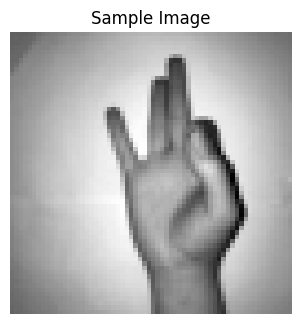

In [8]:
# Data Visualization
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.imshow(x_data[45].reshape(64, 64), cmap='gray')
plt.axis("off")
plt.title("Sample Image")
plt.show()

In [10]:
# Train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=42, stratify=y_data
)
print(f"x_train shape: {x_train.shape}, x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

x_train shape: (1649, 64, 64), x_test shape: (413, 64, 64)
y_train shape: (1649, 10), y_test shape: (413, 10)


In [11]:
#Model 1: A simple architecture with one convolutional layer followed by max pooling
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(64,64,1)))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
#Model 2: A more complex architecture with two convolutional layers
model2 = Sequential()
model2.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(64,64,1)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(10, activation='softmax'))

In [13]:
#Model 3: Dropout Layer for Regularization
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(64,64,1)))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))  # Dropout layer for regularization
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(10, activation='softmax'))

In [14]:
# Train the model
def compile_and_train(model):
  model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))
  return history

history1 = compile_and_train(model1)
history2 = compile_and_train(model2)
history3 = compile_and_train(model3)

Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 136ms/step - accuracy: 0.1413 - loss: 2.7244 - val_accuracy: 0.2785 - val_loss: 2.1203
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.3459 - loss: 2.0202 - val_accuracy: 0.4334 - val_loss: 1.7845
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - accuracy: 0.5536 - loss: 1.5809 - val_accuracy: 0.5714 - val_loss: 1.3433
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.6315 - loss: 1.2320 - val_accuracy: 0.6562 - val_loss: 1.0853
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 137ms/step - accuracy: 0.7437 - loss: 0.9283 - val_accuracy: 0.6877 - val_loss: 0.9477
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.7847 - loss: 0.7561 - val_accuracy: 0.7385 - val_loss: 0.8156
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 121ms/step - accuracy: 0.8492 - loss: 0.5954 - val_accuracy: 0.7651 - val_loss: 0.7073
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - accuracy: 0.8711 - loss: 0.5096 - val_accuracy: 

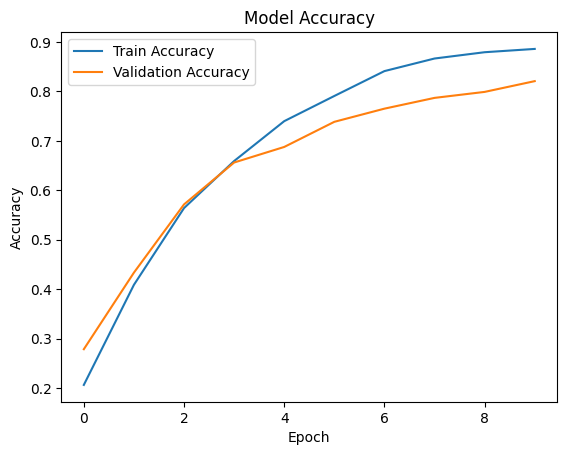

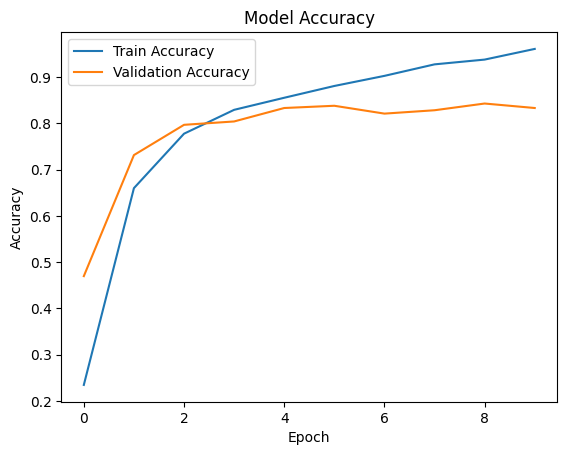

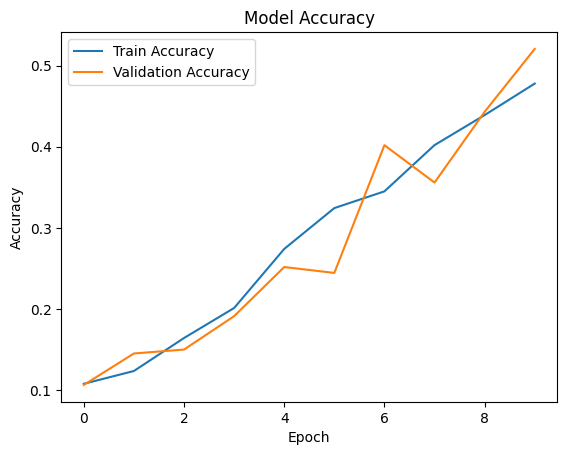

In [15]:
def plot_results(history):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

plot_results(history1)
plot_results(history2)
plot_results(history3)